## 1. Menampilkan metadata dataset secara lengkap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Mengatur opsi untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)  # Menyesuaikan lebar tampilan

In [4]:
# Load the data
df = pd.read_csv('music tours.csv')



In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [6]:
df.describe()


,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [7]:
df.describe(include='object')

,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Average gross,Ref.
count,9,6,20,20,20,20,20,20,20
unique,7,6,20,20,9,20,16,20,20
top,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2013–2014,"$13,928,571",[1]
freq,2,1,1,1,4,1,3,1,1


In [8]:
df.shape

(20, 11)

In [9]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [10]:
# Menampilkan semua nama kolom sebagai list
nama_kolom = df.columns.tolist()
print(nama_kolom)

['Rank', 'Peak', 'All Time Peak', 'Actual\xa0gross', 'Adjusted\xa0gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Ref.']


In [11]:
print(df.isnull().sum())

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Year(s)                              0
Shows                                0
Average gross                        0
Ref.                                 0
dtype: int64


In [12]:
df.isnull().sum().sum()

np.int64(25)

In [13]:
df.isnull().sum() / len(df) * 100

Rank                                 0.0
Peak                                55.0
All Time Peak                       70.0
Actual gross                         0.0
Adjusted gross (in 2022 dollars)     0.0
Artist                               0.0
Tour title                           0.0
Year(s)                              0.0
Shows                                0.0
Average gross                        0.0
Ref.                                 0.0
dtype: float64

In [14]:
df_missing = df[df.isnull().any(axis=1)]
display(df_missing)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]
10,11,NaN,NaN,"$229,100,000[b]","$283,202,896",Beyoncé,The Mrs. Carter Show World Tour,2013–2014,132,"$1,735,606",[15][16]
11,12,NaN,14[17],"$227,400,000","$295,301,479",Lady Gaga,The Monster Ball Tour *,2009–2011,203,"$1,118,227",[18]
12,13,NaN,NaN,"$204,000,000","$251,856,802",Katy Perry,Prismatic World Tour,2014–2015,151,"$1,350,993",[19]
13,14,1[20],NaN,"$200,000,000","$299,676,265",Cher,Living Proof: The Farewell Tour ‡[21][a],2002–2005,325,"$615,385",[20]
14,15,2[c],NaN,"$194,000,000","$281,617,035",Madonna,Confessions Tour,2006,60,"$3,233,333",[5]


In [15]:
jumlah_duplikat = df.duplicated().sum()
print(jumlah_duplikat)

0


In [16]:
df_duplikat = df[df.duplicated(keep=False)]
display(df_duplikat)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.


## 2. Mengolah data (data cleaning dan data manipulation)

In [17]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [18]:
rename_dict = {
    'Actual\xa0gross': 'Actual Gross',
    'Adjusted\xa0gross (in 2022 dollars)': 'Adjusted Gross 2022',
    'Ref.': 'Reference',
    'Tour title': 'Tour Title',
    'Average gross': 'Average Gross'
}

In [19]:
df = df.rename(columns=rename_dict)

In [20]:
print(df.columns.tolist())

['Rank', 'Peak', 'All Time Peak', 'Actual Gross', 'Adjusted Gross 2022', 'Artist', 'Tour Title', 'Year(s)', 'Shows', 'Average Gross', 'Reference']


In [21]:
# Fungsi untuk memisahkan tahun dan menghitung durasi
def split_years(years):
    if pd.isna(years):  # Jika data kosong
        return None, None, None
    # Mengganti en-dash (–) dengan minus (-) dan hapus spasi
    years = years.replace('–', '-').replace(' ', '')
    if '-' in years:
        start, end = years.split('-')
        start = int(start)
        end = int(end)
        duration = end - start + 1
        return start, end, duration
    else:  # Jika hanya satu tahun
        year = int(years)
        return year, year, 1

In [22]:
# Simpan posisi kolom 'Year(s)'
year_position = df.columns.get_loc('Year(s)')

In [23]:
# Buat kolom baru dari 'Year(s)'
new_columns = pd.DataFrame(
    df['Year(s)'].apply(split_years).tolist(), 
    columns=['Start Year', 'End Year', 'Duration (Year)'], 
    index=df.index
)

In [24]:
# Hapus kolom 'Year(s)'
df = df.drop(columns=['Year(s)'])

In [25]:
# Sisipkan kolom baru di posisi asli 'Year(s)'
df = pd.concat([df.iloc[:, :year_position], new_columns, df.iloc[:, year_position:]], axis=1)

In [26]:
df.head()

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023,2024,2,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,2023,1,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008,2009,2,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018,2019,2,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,"$6,522,173",[8]


In [27]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023,2024,2,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,2023,1,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008,2009,2,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018,2019,2,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,2012,1,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008,2009,2,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023,2024,2,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,2016,1,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,2015,1,85,"$2,945,882",[14]


In [28]:
def clean_actual_gross(value):
    if pd.isna(value):  # Jika nilai kosong
        return None
    
    # Ubah ke string
    value = str(value).strip()
    
    # Hapus simbol dolar dan koma
    value = value.replace('$', '').replace(',', '')
    
    # Hapus karakter dalam kurung siku seperti [a], [b], dll.
    value = re.sub(r'\[\w+\]', '', value)
    
    # Hapus spasi tambahan yang mungkin tersisa
    value = value.strip()
    
    # Konversi ke integer (atau float jika ada desimal)
    try:
        # Jika ada desimal, konversi ke float lalu ke int
        if '.' in value:
            return int(float(value))
        return int(value)
    except ValueError:
        return None  # Jika konversi gagal, kembalikan None

In [29]:
# Terapkan fungsi ke kolom 'Actual Gross'
df['Actual Gross'] = df['Actual Gross'].apply(clean_actual_gross)

In [30]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,"$780,000,000",Taylor Swift,The Eras Tour †,2023,2024,2,56,"$13,928,571",[1]
1,2,1,7[2],579800000,"$579,800,000",Beyoncé,Renaissance World Tour,2023,2023,1,56,"$10,353,571",[3]
2,3,1[4],2[5],411000000,"$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008,2009,2,85,"$4,835,294",[6]
3,4,2[7],10[7],397300000,"$454,751,555",Pink,Beautiful Trauma World Tour,2018,2019,2,156,"$2,546,795",[7]
4,5,2[4],NaN,345675146,"$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,"$6,522,173",[8]
5,6,2[4],10[9],305158363,"$388,978,496",Madonna,The MDNA Tour,2012,2012,1,88,"$3,467,709",[9]
6,7,2[10],NaN,280000000,"$381,932,682",Celine Dion,Taking Chances World Tour,2008,2009,2,131,"$2,137,405",[11]
7,7,NaN,NaN,257600000,"$257,600,000",Pink,Summer Carnival †,2023,2024,2,41,"$6,282,927",[12]
8,9,NaN,NaN,256084556,"$312,258,401",Beyoncé,The Formation World Tour,2016,2016,1,49,"$5,226,215",[13]
9,10,NaN,NaN,250400000,"$309,141,878",Taylor Swift,The 1989 World Tour,2015,2015,1,85,"$2,945,882",[14]


In [31]:
def clean_gross_value(value):
    if pd.isna(value):  # Jika nilai kosong
        return None
    # Ubah ke string dan hapus simbol dolar, koma, dan karakter tambahan seperti [a], [b]
    value = str(value).replace('$', '').replace(',', '').replace('[', '').replace(']', '').strip()
    # Konversi ke integer (atau float jika ada desimal)
    try:
        return int(value)
    except ValueError:
        return None  # Jika konversi gagal, kembalikan None

In [32]:
df['Adjusted Gross 2022'] = df['Adjusted Gross 2022'].apply(clean_gross_value)

In [33]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023,2024,2,56,"$13,928,571",[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,2023,1,56,"$10,353,571",[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008,2009,2,85,"$4,835,294",[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018,2019,2,156,"$2,546,795",[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,"$6,522,173",[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,2012,1,88,"$3,467,709",[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008,2009,2,131,"$2,137,405",[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023,2024,2,41,"$6,282,927",[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,2016,1,49,"$5,226,215",[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,2015,1,85,"$2,945,882",[14]


In [34]:
# Fungsi untuk membersihkan data (sama seperti sebelumnya)
def clean_gross_value(value):
    if pd.isna(value):  # Jika nilai kosong
        return None
    # Ubah ke string dan hapus simbol dolar, koma, dan karakter tambahan seperti [a], [b]
    value = str(value).replace('$', '').replace(',', '').replace('[', '').replace(']', '').strip()
    # Konversi ke integer (atau float jika ada desimal)
    try:
        return int(value)
    except ValueError:
        return None  # Jika konversi gagal, kembalikan None

In [35]:
# Terapkan fungsi ke kolom 'Average Gross'
df['Average Gross'] = df['Average Gross'].apply(clean_gross_value)

In [36]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023,2024,2,56,13928571,[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,2023,1,56,10353571,[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008,2009,2,85,4835294,[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018,2019,2,156,2546795,[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,6522173,[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,2012,1,88,3467709,[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008,2009,2,131,2137405,[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023,2024,2,41,6282927,[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,2016,1,49,5226215,[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,2015,1,85,2945882,[14]


In [37]:
def clean_tour_title(value):
    if pd.isna(value):  # Jika nilai kosong
        return None
    # Ubah ke string
    value = str(value)
    # Hapus simbol ‡, †, * dan kurung beserta isinya
    value = value.replace('‡', '').replace('†', '').replace('*', '')
    value = re.sub(r'\s*\[.*?\]', '', value)  # Hapus [isi apa saja] termasuk spasi sebelumnya
    # Hapus sisa pola seperti "21 a" atau "4a" (angka diikuti spasi/huruf)
    value = re.sub(r'\d+\s*[a-zA-Z]+', '', value)  # Hapus angka diikuti spasi dan huruf
    # Hapus spasi berlebih
    value = ' '.join(value.split())
    return value

In [38]:
# Terapkan fungsi ke kolom 'Tour Title'
df['Tour Title'] = df['Tour Title'].apply(clean_tour_title)

In [39]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023,2024,2,56,13928571,[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,2023,1,56,10353571,[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour,2008,2009,2,85,4835294,[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018,2019,2,156,2546795,[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,6522173,[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,2012,1,88,3467709,[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008,2009,2,131,2137405,[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival,2023,2024,2,41,6282927,[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,2016,1,49,5226215,[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The Tour,2015,2015,1,85,2945882,[14]


In [40]:
# Fungsi untuk membersihkan kolom 'Peak' dan 'All Time Peak'
def clean_peak(value):
    if pd.isna(value) or value == 'Missing value':  # Jika nilai kosong atau 'Missing value'
        return None
    # Ubah ke string
    value = str(value)
    # Hapus semua pola di dalam kurung beserta kurungnya
    value = re.sub(r'\[.*?\]', '', value)
    # Konversi ke integer
    try:
        return int(value)
    except ValueError:
        return None

In [41]:
# Terapkan fungsi ke kolom 'Peak' dan 'All Time Peak'
df['Peak'] = df['Peak'].apply(clean_peak).astype('Int64')  # Gunakan tipe Int64 untuk mendukung None
df['All Time Peak'] = df['All Time Peak'].apply(clean_peak).astype('Int64')

In [42]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023,2024,2,56,13928571,[1]
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,2023,1,56,10353571,[3]
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour,2008,2009,2,85,4835294,[6]
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018,2019,2,156,2546795,[7]
4,5,2,<NA>,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,6522173,[8]
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,2012,1,88,3467709,[9]
6,7,2,<NA>,280000000,381932682,Celine Dion,Taking Chances World Tour,2008,2009,2,131,2137405,[11]
7,7,<NA>,<NA>,257600000,257600000,Pink,Summer Carnival,2023,2024,2,41,6282927,[12]
8,9,<NA>,<NA>,256084556,312258401,Beyoncé,The Formation World Tour,2016,2016,1,49,5226215,[13]
9,10,<NA>,<NA>,250400000,309141878,Taylor Swift,The Tour,2015,2015,1,85,2945882,[14]


In [43]:
# Terapkan fungsi ke kolom 'Peak' dan 'All Time Peak'
df['Peak'] = df['Peak'].fillna(0)
df['All Time Peak'] = df['All Time Peak'].fillna(0)

In [44]:
df

,Rank,Peak,All Time Peak,Actual Gross,Adjusted Gross 2022,Artist,Tour Title,Start Year,End Year,Duration (Year),Shows,Average Gross,Reference
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023,2024,2,56,13928571,[1]
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,2023,1,56,10353571,[3]
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour,2008,2009,2,85,4835294,[6]
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018,2019,2,156,2546795,[7]
4,5,2,0,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,2018,1,53,6522173,[8]
5,6,2,10,305158363,388978496,Madonna,The MDNA Tour,2012,2012,1,88,3467709,[9]
6,7,2,0,280000000,381932682,Celine Dion,Taking Chances World Tour,2008,2009,2,131,2137405,[11]
7,7,0,0,257600000,257600000,Pink,Summer Carnival,2023,2024,2,41,6282927,[12]
8,9,0,0,256084556,312258401,Beyoncé,The Formation World Tour,2016,2016,1,49,5226215,[13]
9,10,0,0,250400000,309141878,Taylor Swift,The Tour,2015,2015,1,85,2945882,[14]


## 3. Menampilkan analisis deskriptif statistik / data outlier

In [45]:
# Kolom yang akan dianalisis
columns_to_analyze = ['Actual Gross', 'Adjusted Gross 2022', 'Start Year', 'End Year', 'Shows', 'Average Gross']

In [46]:
# Fungsi untuk deteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

In [47]:
# # Fungsi untuk deteksi outlier menggunakan Z-Score
# def detect_outliers_zscore(data, column, threshold=3):
#     z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
#     lower_bound = data[column].mean() - threshold * data[column].std()
#     upper_bound = data[column].mean() + threshold * data[column].std()
#     outliers = data[z_scores > threshold]
#     return lower_bound, upper_bound, outliers

In [48]:
# Analisis untuk setiap kolom menggunakan metode IQR
for column in columns_to_analyze:
    print(f"\n=== Analisis Outlier untuk Kolom: {column} (Metode IQR) ===")
    
    # Metode IQR
    lower_bound_iqr, upper_bound_iqr, outliers_iqr = detect_outliers_iqr(df, column)
    print(f"Batas Bawah (IQR): {lower_bound_iqr}")
    print(f"Batas Atas (IQR): {upper_bound_iqr}")
    print("Data Outlier (IQR):")
    if not outliers_iqr.empty:
        print(outliers_iqr[['Artist', 'Tour Title', column]])
    else:
        print("Tidak ada outlier menggunakan metode IQR.")


=== Analisis Outlier untuk Kolom: Actual Gross (Metode IQR) ===
Batas Bawah (IQR): 5818661.875
Batas Atas (IQR): 500968896.875
Data Outlier (IQR):
         Artist              Tour Title  Actual Gross
0  Taylor Swift           The Eras Tour     780000000
1       Beyoncé  Renaissance World Tour     579800000

=== Analisis Outlier untuk Kolom: Adjusted Gross 2022 (Metode IQR) ===
Batas Bawah (IQR): 25721594.25
Batas Atas (IQR): 612479178.25
Data Outlier (IQR):
         Artist     Tour Title  Adjusted Gross 2022
0  Taylor Swift  The Eras Tour            780000000

=== Analisis Outlier untuk Kolom: Start Year (Metode IQR) ===
Batas Bawah (IQR): 2003.375
Batas Atas (IQR): 2024.375
Data Outlier (IQR):
   Artist                       Tour Title  Start Year
13   Cher  Living Proof: The Farewell Tour        2002

=== Analisis Outlier untuk Kolom: End Year (Metode IQR) ===
Batas Bawah (IQR): 2003.5
Batas Atas (IQR): 2025.5
Data Outlier (IQR):
Tidak ada outlier menggunakan metode IQR.

=== Anali

In [49]:
# # Analisis untuk setiap kolom menggunakan metode Z-Score
# for column in columns_to_analyze:
#     print(f"\n=== Analisis Outlier untuk Kolom: {column} (Metode Z-Score) ===")
    
#     # Metode Z-Score
#     lower_bound_z, upper_bound_z, outliers_zscore = detect_outliers_zscore(df, column)
#     print(f"Batas Bawah (Z-Score): {lower_bound_z}")
#     print(f"Batas Atas (Z-Score): {upper_bound_z}")
#     print("Data Outlier (Z-Score):")
#     if not outliers_zscore.empty:
#         print(outliers_zscore[['Artist', 'Tour Title', column]])
#     else:
#         print("Tidak ada outlier menggunakan metode Z-Score.")


=== Visualisasi Boxplot untuk Semua Kolom ===


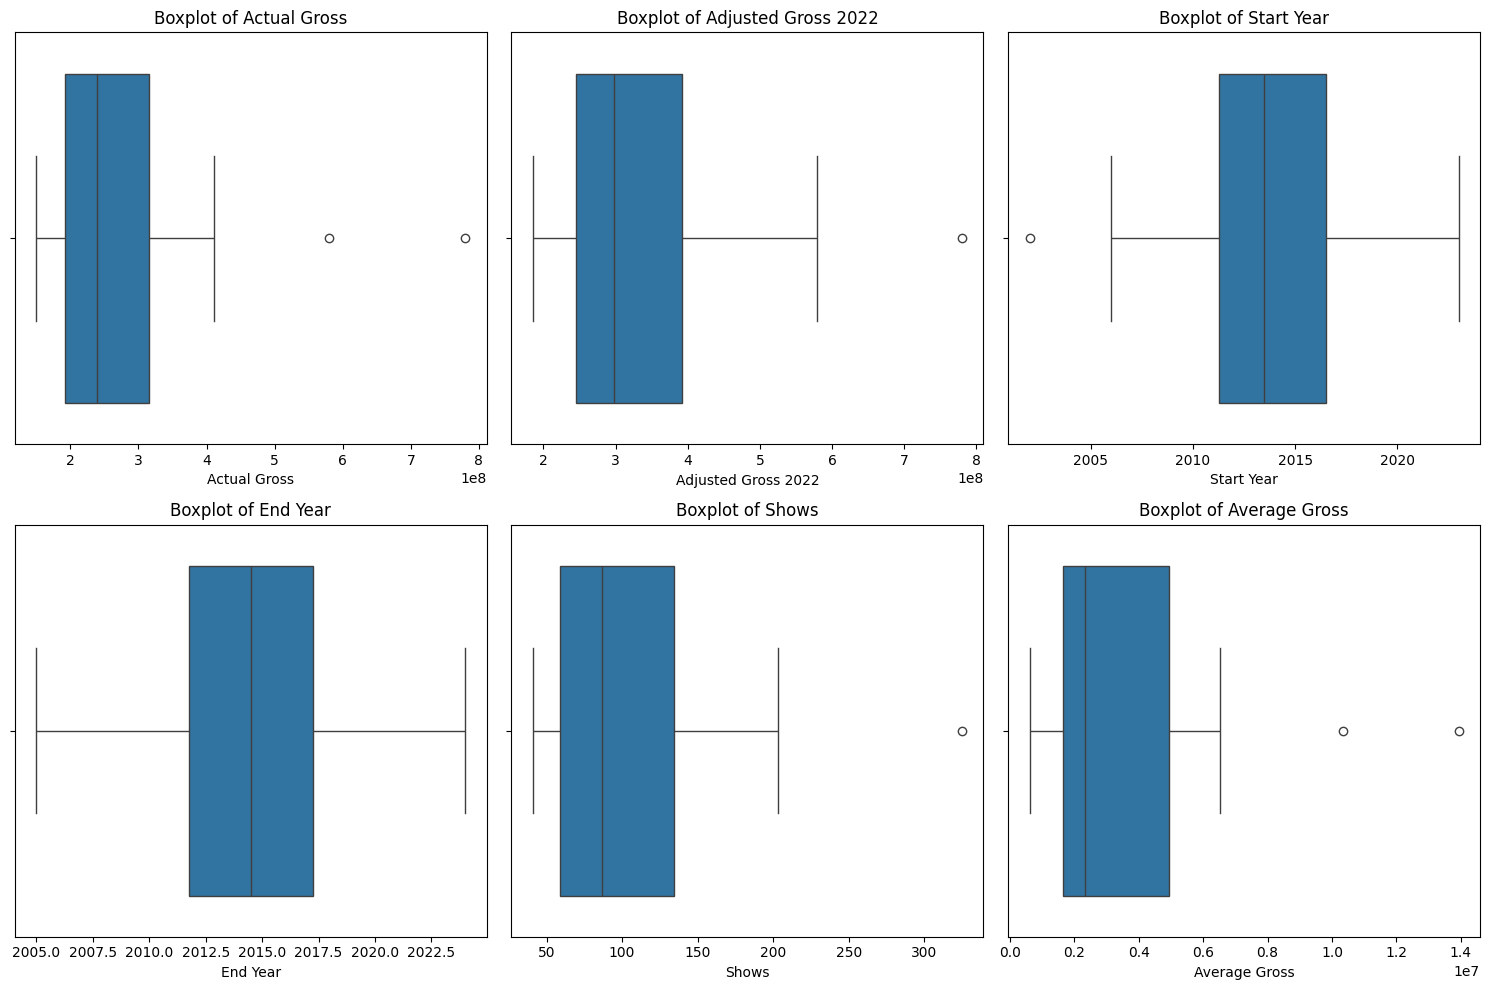

In [50]:
# 3. Visualisasi Boxplot untuk semua kolom
print("\n=== Visualisasi Boxplot untuk Semua Kolom ===")
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

## 4. Menganalisis Business Problem/Question

### 7 Business Problems/Questions :

1. Artis Mana yang Menghasilkan Total Pendapatan Kotor Tertinggi?
 - Kategori: Comparison
 - Visualisasi: Bar Chart
 - Tujuan: Membandingkan total Actual Gross antar artis.

2. Bagaimana Hubungan antara Jumlah Pertunjukan dan Pendapatan Rata-Rata per Show?
 - Kategori: Relationship
 - Visualisasi: Scatter Plot
 - Tujuan: Mengetahui apakah lebih banyak pertunjukan meningkatkan atau menurunkan pendapatan per show.

3. Bagaimana Distribusi Pendapatan Kotor Aktual di Seluruh Tur?
 - Kategori: Distribution
 - Visualisasi: Box Plot
 - Tujuan: Melihat sebaran dan outlier pendapatan kotor.

4. Tahun Mulai Mana yang Menghasilkan Pendapatan Kotor Terbesar?
 - Kategori: Comparison
 - Visualisasi: Bar Chart
 - Tujuan: Membandingkan total pendapatan kotor berdasarkan Start Year.

5. Apakah Durasi Tur Berpengaruh pada Total Pendapatan Kotor?
 - Kategori: Relationship
 - Visualisasi: Scatter Plot
 - Tujuan: Menganalisis hubungan antara Duration (Year) dan Actual Gross.

6. Bagaimana Distribusi Jumlah Pertunjukan di Seluruh Tur?
 - Kategori: Distribution
 - Visualisasi: Histogram
 - Tujuan: Melihat sebaran jumlah pertunjukan (Shows).

7. Tur Mana yang Paling Efisien Berdasarkan Pendapatan Rata-Rata per Pertunjukan?
 - Kategori: Comparison
 - Visualisasi: Bar Chart
 - Tujuan: Membandingkan Average Gross antar tur untuk menemukan yang paling efisien.

# Kegiatan 2 - Visualisasi

## 1. Membuat visualisasi data sesuai kategori, bisa comparison/ relationship/ distribution sebanyak 3 grafik.
 

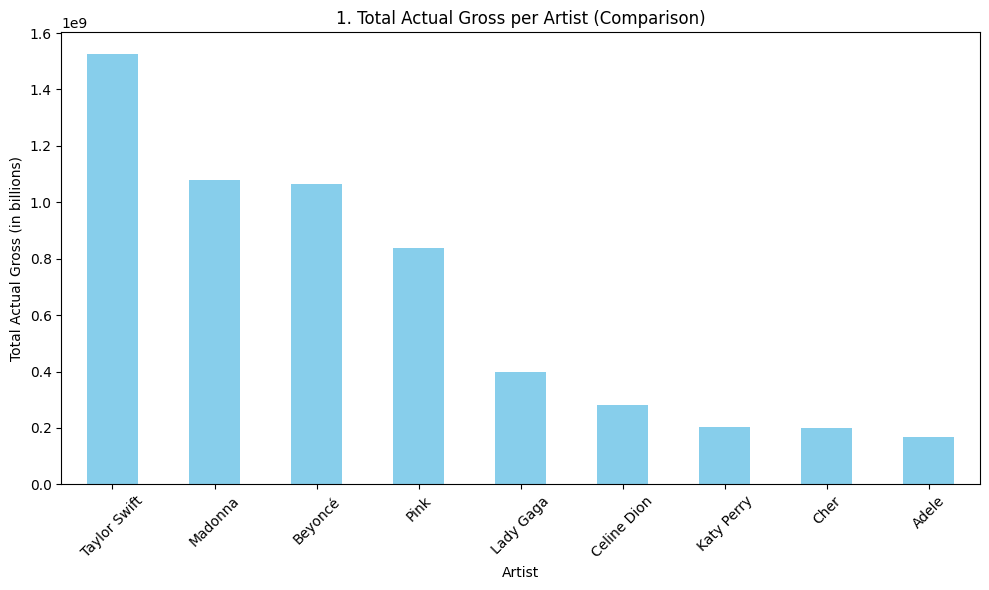

In [68]:
# 1. Comparison - Artis dengan Total Actual Gross Tertinggi (Bar Chart)
artist_gross = df.groupby('Artist')['Actual Gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
artist_gross.plot(kind='bar', color='skyblue')
plt.title('1. Total Actual Gross per Artist (Comparison)')
plt.xlabel('Artist')
plt.ylabel('Total Actual Gross (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

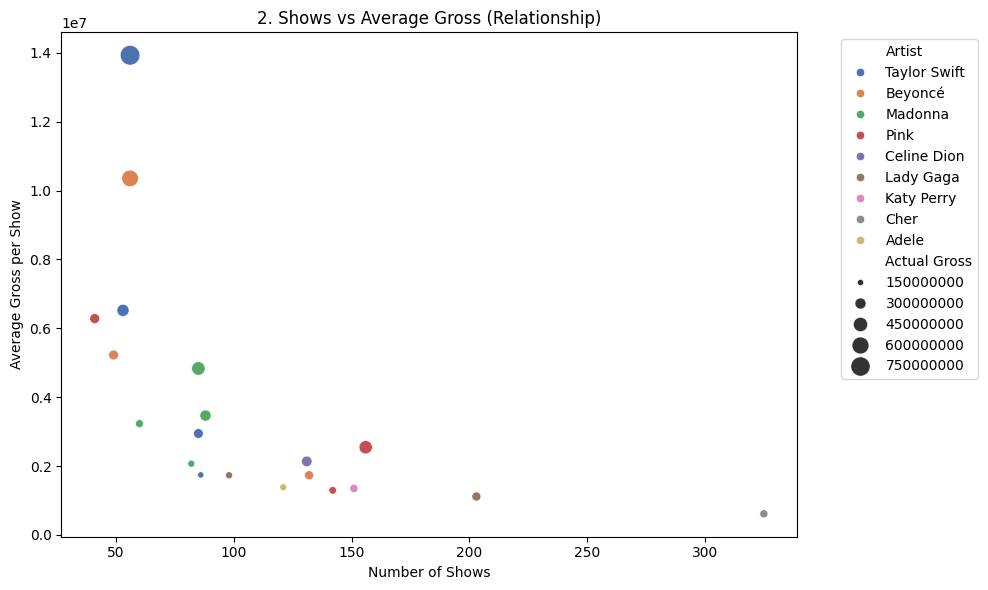

In [69]:
# 2. Relationship - Shows vs Average Gross (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shows', y='Average Gross', hue='Artist', size='Actual Gross', data=df, palette='deep', sizes=(20, 200))
plt.title('2. Shows vs Average Gross (Relationship)')
plt.xlabel('Number of Shows')
plt.ylabel('Average Gross per Show')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

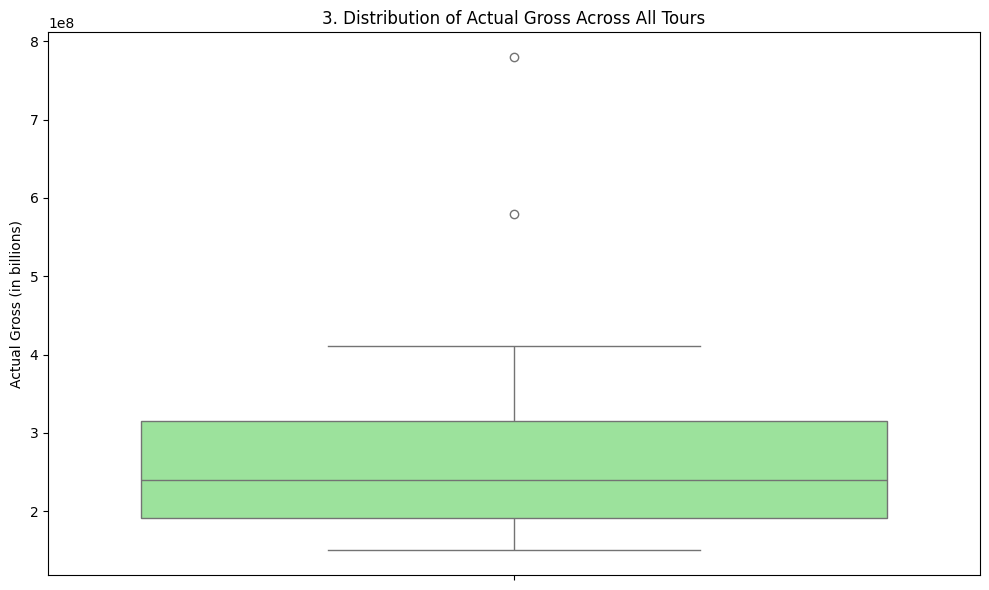

In [70]:
# 3. Distribution - Distribusi Actual Gross (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(y='Actual Gross', data=df, color='lightgreen')
plt.title('3. Distribution of Actual Gross Across All Tours')
plt.ylabel('Actual Gross (in billions)')
plt.tight_layout()
plt.show()

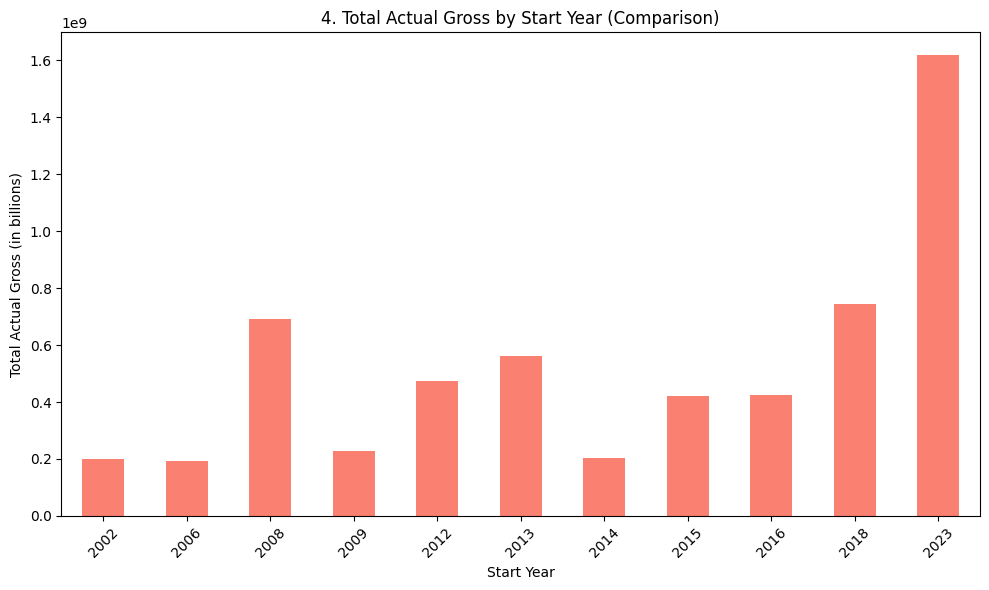

In [71]:
# 4. Comparison - Total Actual Gross per Start Year (Bar Chart)
yearly_gross = df.groupby('Start Year')['Actual Gross'].sum()
plt.figure(figsize=(10, 6))
yearly_gross.plot(kind='bar', color='salmon')
plt.title('4. Total Actual Gross by Start Year (Comparison)')
plt.xlabel('Start Year')
plt.ylabel('Total Actual Gross (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

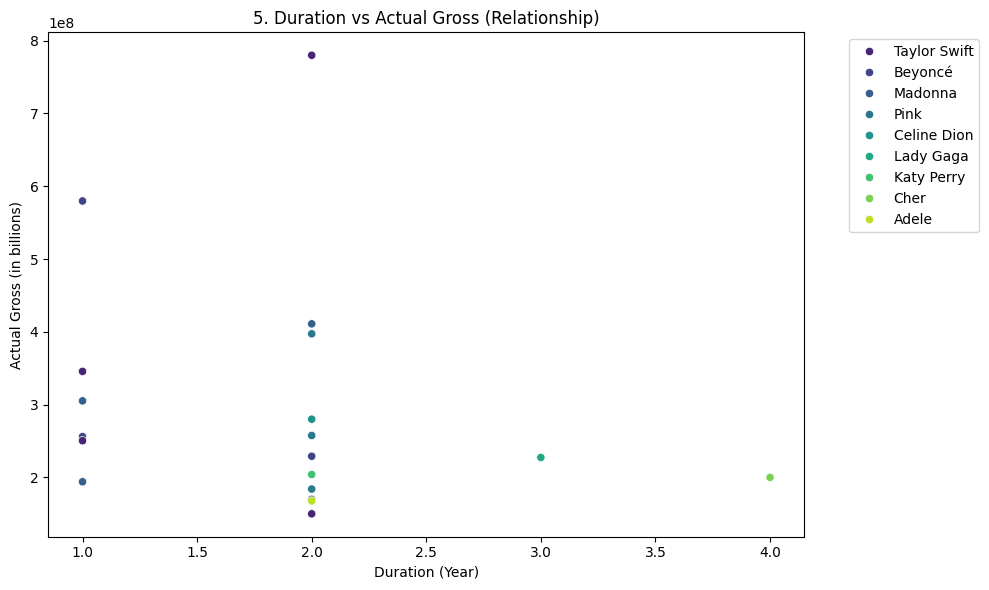

In [72]:
# 5. Relationship - Duration vs Actual Gross (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (Year)', y='Actual Gross', hue='Artist', data=df, palette='viridis')
plt.title('5. Duration vs Actual Gross (Relationship)')
plt.xlabel('Duration (Year)')
plt.ylabel('Actual Gross (in billions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

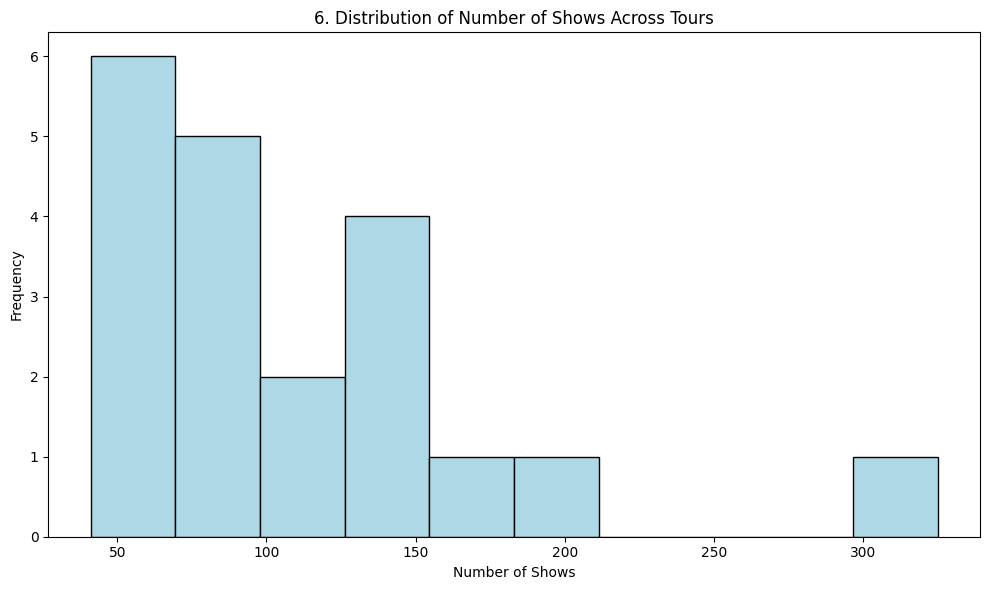

In [73]:
# 6. Distribution - Distribusi Jumlah Shows (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['Shows'], bins=10, color='lightblue', edgecolor='black')
plt.title('6. Distribution of Number of Shows Across Tours')
plt.xlabel('Number of Shows')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13896\851100400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Gross', y='Tour Title', data=top_avg_gross, palette='muted')


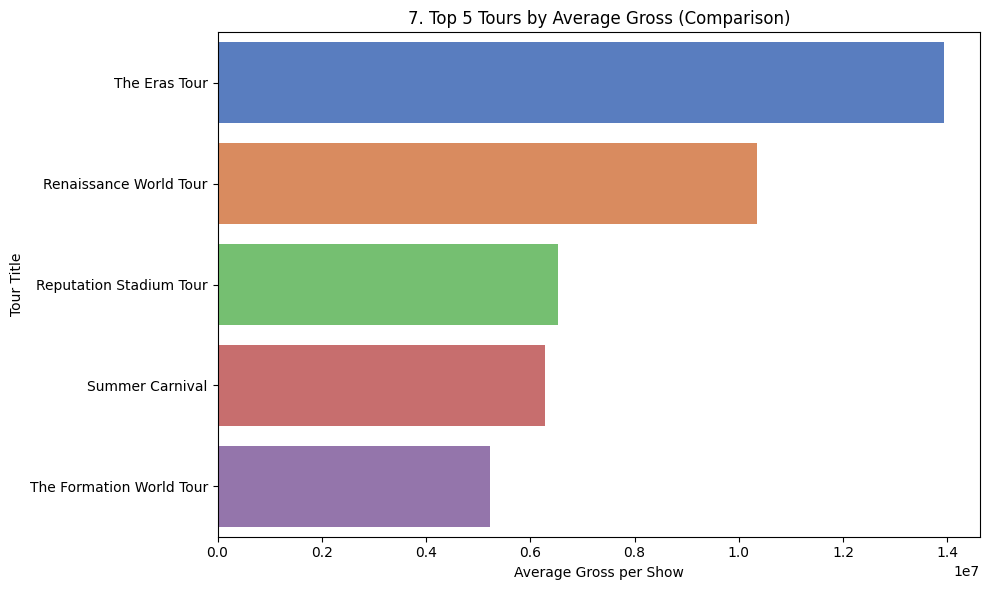

In [74]:
# 7. Comparison - Top 5 Tours by Average Gross (Bar Chart)
top_avg_gross = df[['Tour Title', 'Average Gross']].sort_values(by='Average Gross', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Gross', y='Tour Title', data=top_avg_gross, palette='muted')
plt.title('7. Top 5 Tours by Average Gross (Comparison)')
plt.xlabel('Average Gross per Show')
plt.ylabel('Tour Title')
plt.tight_layout()
plt.show()